# Getting Into Visualizations with Seaborn:
## An Introduction to Graphical Exploratory Data Analysis and Generation
### Getting Started

In [2]:
#Import Packages
import pandas as pd
import numpy as np
import math
from sklearn import datasets
from random import random
from random import seed
seed(1)

#Seaborn makes creating attractive graphs simpler
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)},font_scale=1)

#Matplotlib allows for completely custom graphing
from matplotlib import pyplot as plt

## 1) Relational Plotting

Relational Plotting in Seaborn returns a figure object that allows you to manipulate the data. This is contrasted against the ax object that is returned from other methods.

rel-plot = relational plot

Seaborn allows you to easily graph two (or more) variables against each other.
Here are a few examples.

Please feel free to play around with these data generating techniques!

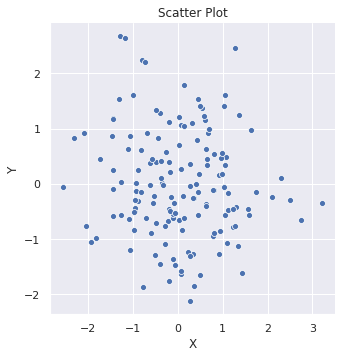

In [3]:
#Seaborn can create many types of graphs, such as a relational plot.
X = np.random.randn(150)
Y = np.random.randn(150)

sns.relplot(x="X",y="Y",data=pd.DataFrame({'X':X,'Y':Y})).set(title='Scatter Plot')

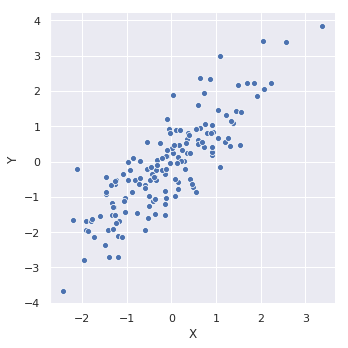

In [4]:
#For example, to graph a linear relationship:
X = np.random.randn(150).tolist()
Y = list(map(lambda x: x + np.random.randn(1)[0]/1.5, X))
#Create a new list of X with the function f(x) = x + N(0,1)/1.5 mapped over it

sns.relplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y}))

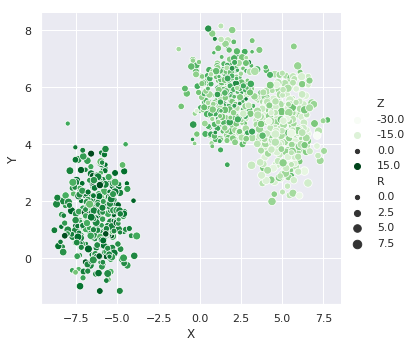

In [6]:
#Or to plot categories, and add details
XYZ, response = datasets.make_blobs(n_samples=1000, centers=3, n_features=3)

data = {'X':[],'Y':[],'Z':[],'R':[]}
for i in XYZ:
    data['X'].append(i[0])
    data['Y'].append(i[1])
    data['Z'].append(i[2]+3*np.random.randn(1)[0])
    data['R'].append(response[len(data['X'])-1]+np.random.uniform(0,5))

sns.relplot(data=pd.DataFrame(data), x='X',y='Y', size = 'R', hue='Z', palette='Greens')

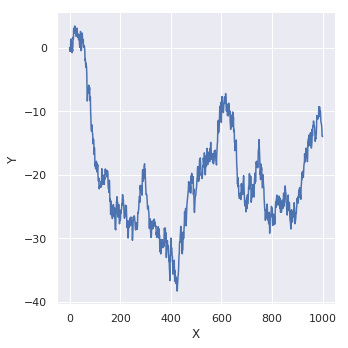

In [9]:
#You can also make line graphs, like for equities
X = np.linspace(0, 1000, 1000).tolist()
Y = [0]

for i in range(len(X)-1):
    Y.append(float(Y[i]+np.random.randn(1))) #Random Walk

sns.relplot(x="X",y="Y",data=pd.DataFrame({'X':X,'Y':Y}),kind='line')

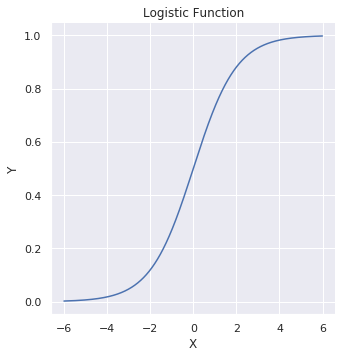

In [10]:
#Or for mathematical functions
X = np.arange(-6, 6, .01).tolist()
Y = list(map(lambda x: 1/(1+math.e**(x*-1)), X)) #f(x) = 1/(1+e**(-x))

sns.relplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y}),kind='line').set(title='Logistic Function')

## 2) Categorical Plotting
Seaborn makes it easy to investigate by discrete binning

In [11]:
#First, generate some data
X = np.random.randint(0,4,size=500)
    
Y = list(map(lambda x: abs(2*x+np.random.randn(1)[0]), X)) #f(x) = |2x + N(0,1)|

Z = np.random.randint(2, size=500).tolist()

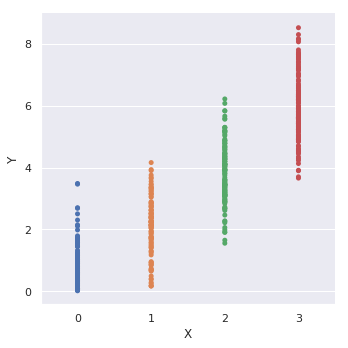

In [12]:
#Looking at the set of distributions we find:

sns.catplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y}),jitter=False)

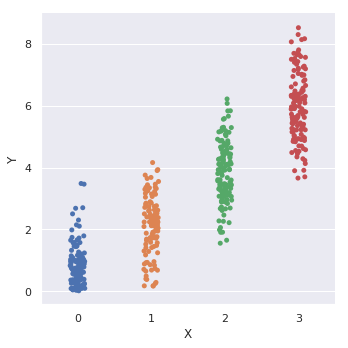

In [13]:
#Then, for a little more information on the distribution, you can

sns.catplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y}),jitter=True)

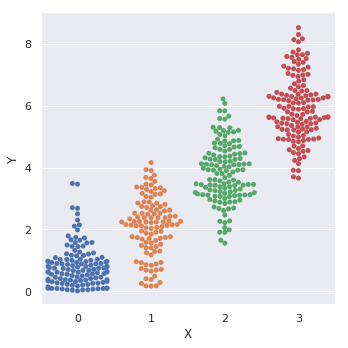

In [14]:
#Or, as an alternative

sns.catplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y}),kind='swarm')

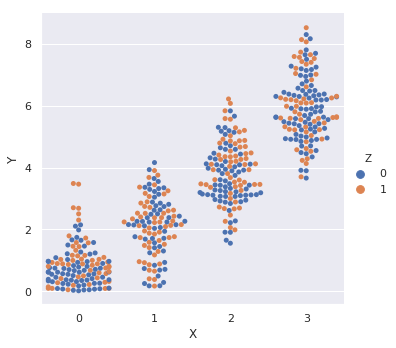

In [15]:
#You can also computationally look at this with a second category

sns.catplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y,'Z':Z}),kind='swarm',hue='Z')

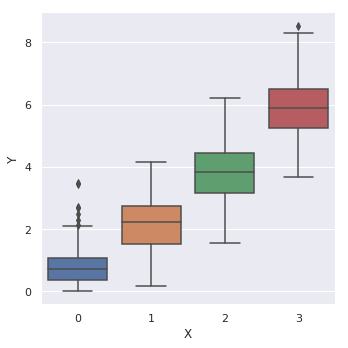

In [16]:
#You can also use functions to aggregate this information and make it a little easier to interpret

sns.catplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y}),kind='box')

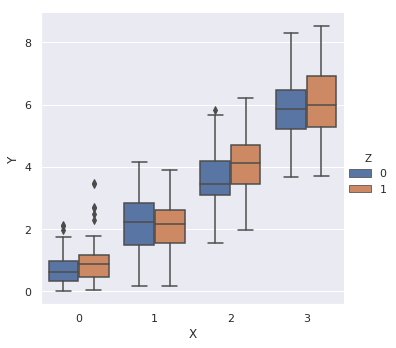

In [17]:
#Including more details as necessary

sns.catplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y,'Z':Z}),kind='box',hue='Z')

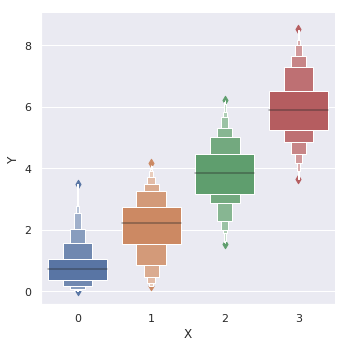

In [18]:
#Or a little more creatively

sns.catplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y}),kind='boxen')

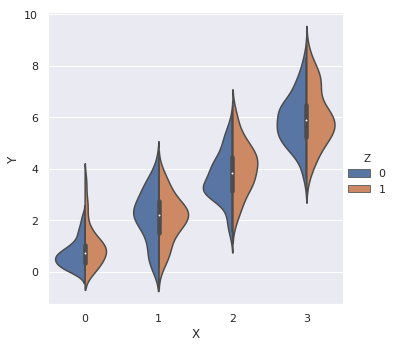

In [19]:
#You can also keep comparisons within just one bubble

sns.catplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y,'Z':Z}),kind='violin',hue='Z',split=True)

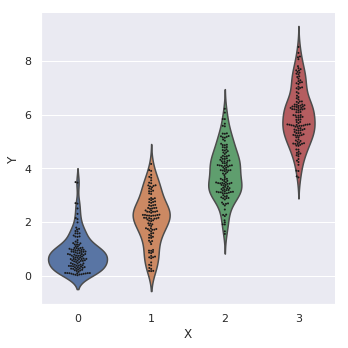

In [21]:
#Finally, it's also possible to grab the figure and write over top of it to combine the two methods

fig = sns.catplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y,'Z':Z}),kind="violin", inner=None)
sns.swarmplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y,'Z':Z}), color="k", size=2)

## 3) Working with Bar Plots

Bar plots are very good for creating counts of data

In [3]:
#First, generate some data
X = np.random.randint(0,9,size=1000)
    
Y = list(map(lambda x: abs(2*x+np.random.randn(1))[0], X)) #f(x) = |2x + N(0,1)|

Z = np.random.randint(2, size=1000).tolist()

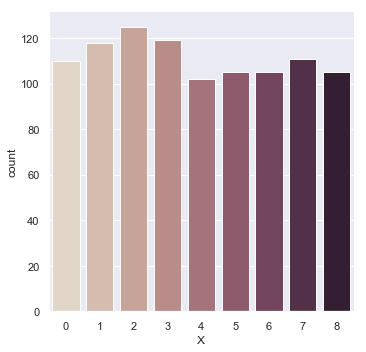

In [4]:
#For a simple example

sns.catplot(x='X',data=pd.DataFrame({'X':X,'Y':Y,'Z':Z}), kind='count', palette="ch:.25")

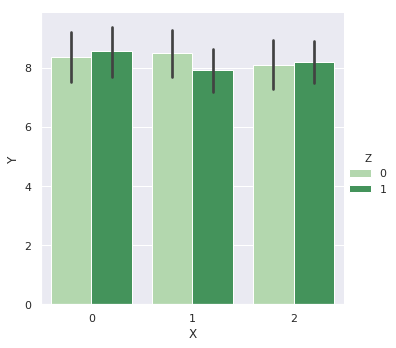

In [25]:
#Or again to do comparisons amongst different categories
X = np.random.randint(0,3,size=1000)

sns.catplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y,'Z':Z}), kind='bar', hue='Z', palette="Greens")

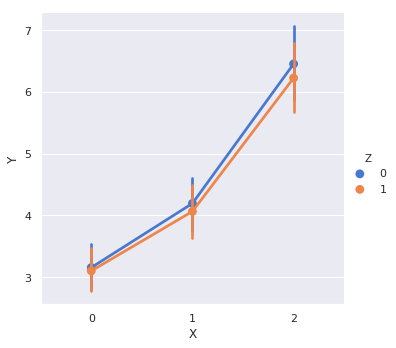

In [26]:
#A similar style can help show stages
Y = list(map(lambda x: abs(3*x+4*np.random.randn(1))[0], X)) #f(x) = |5x + N(0,1)|

sns.catplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y,'Z':Z}), kind='point', hue='Z', palette="muted")

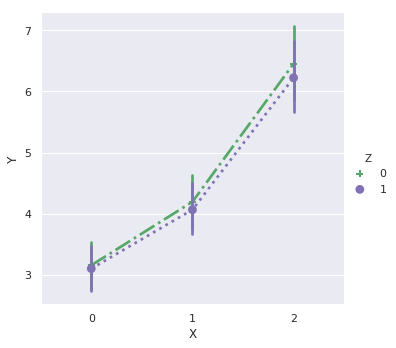

In [27]:
#You can also customize indivual lines, point styles, and colors

sns.catplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y,'Z':Z}), kind='point', hue='Z',
            markers=['+', 'o'], linestyles=['-.', ':'], palette={0: 'g', 1: 'm'})

## 4) Distributions
There are extremely powerful techniques of both one and two dimensional data. Let's investigate

/Users/jacobswe/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


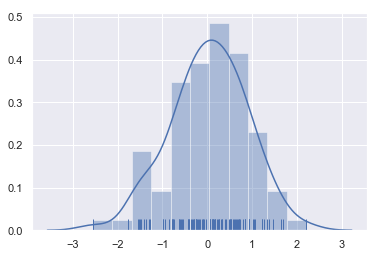

In [5]:
#First off, a general fit of data can be found by the following. Note, this is not a 'normal curve' 
x = np.random.normal(size=100)

sns.distplot(x, rug=True)

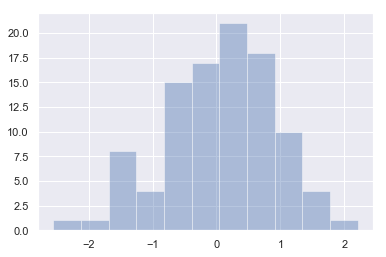

In [8]:
#You can also add or remove all these
sns.distplot(x,hist=True,kde=False)

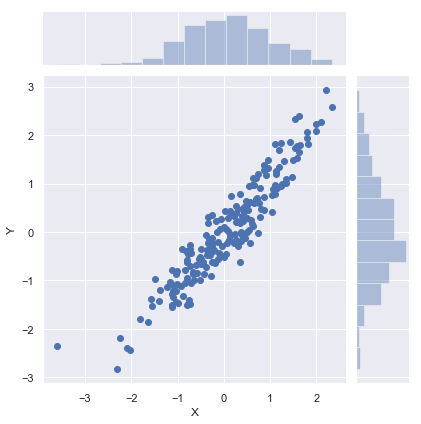

In [11]:
#There are also capabilities in the second dimension
X = np.random.randn(200)
Y = list(map(lambda x: x + np.random.randn(1)/3, X))
Y = [item for sublist in Y for item in sublist]

sns.jointplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y}))

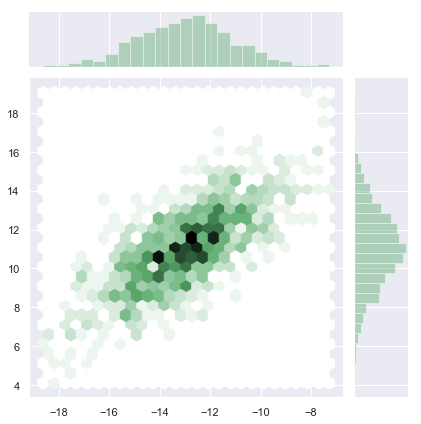

In [12]:
#Now, imagining we are looking at data such as population density, we can use the following binned plot
X,Y = np.random.multivariate_normal(mean=[-13, 11], cov=[(4, 3), (3, 4)], size=1000).T

sns.jointplot(x=X, y=Y, kind="hex", color="g")

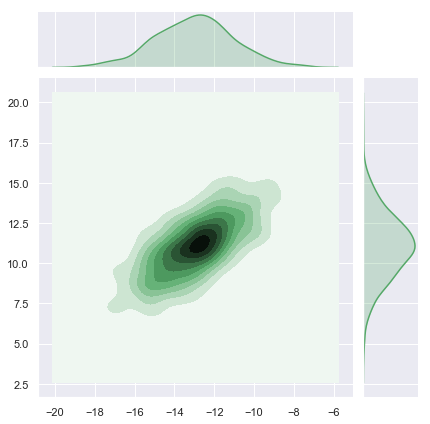

In [13]:
#Or as a density estimate
sns.jointplot(x=X, y=Y, kind="kde", color="g")

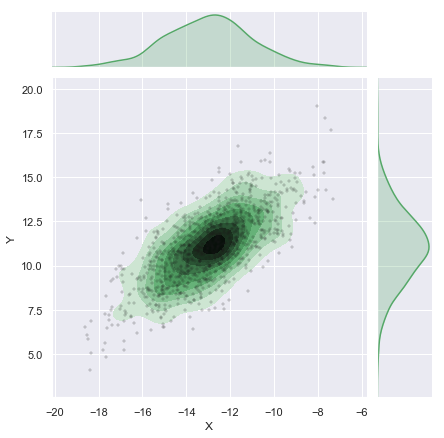

In [14]:
#And finally, fully custom presentation
fig = sns.jointplot(x=X, y=Y, kind="kde", color="g")
fig.plot_joint(plt.scatter, c="k", s=10, linewidth=0.2, marker="+")
fig.ax_joint.collections[0].set_alpha(0)
fig.set_axis_labels('X','Y')

## 5) Plotting regressions
Although this is not a statistical engine, Seaborn does a great job of visualizing your simple regression based graphs. We will cover the fundamentals of regression analysis soon, but for now let's look at how we can fit these curves.

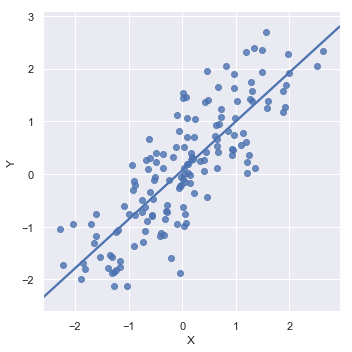

In [15]:
#Just like how we've seen relplot, catplot, jointplot, and distplot, we can do regression with lmplot.
#Recall our second ever seaborn plot where we saw a linear relationship. Let's add in a LSE line

X = np.random.randn(150).tolist()
Y = list(map(lambda x: x + np.random.randn(1)[0]/1.5, X))#f(x) = x + N(0,2/3)

sns.lmplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y}),ci=False)

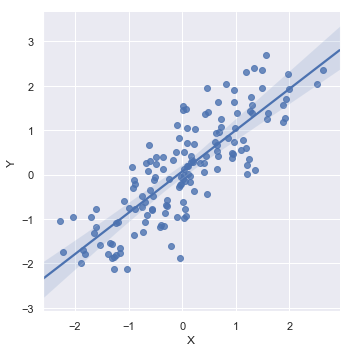

In [17]:
#Then with a 90% confidence interval

sns.lmplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y}),ci=100)

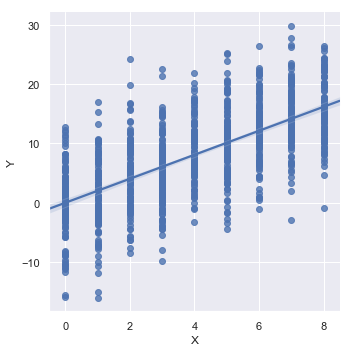

In [18]:
#This can also be expanded to discrete data
X = np.random.randint(0,9,size=1000)
Y = list(map(lambda x: 2*x+6*np.random.randn(1)[0], X)) #f(x) = |2x + N(0,6)|

sns.lmplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y}))

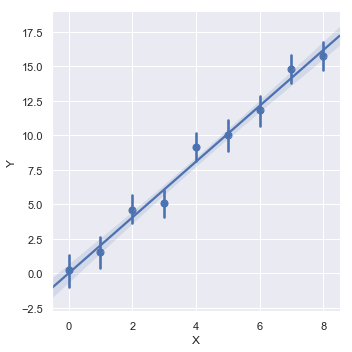

In [19]:
#Or with confidence intervals on the y values
sns.lmplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y}),x_estimator=np.mean)

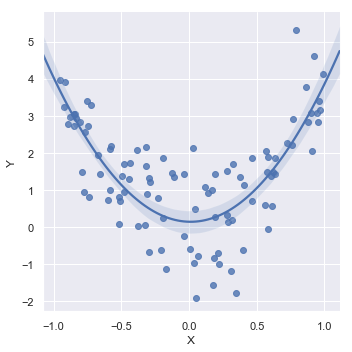

In [20]:
#You can also fit alternative lines, such as polynomial functions
X = (np.random.random(100)-.5)*2 #[-1,1]
Y = list(map(lambda x: (2*x)**2 + np.random.randn(1)[0], X)) #f(x) = (2x)**2 + N(0,1)

sns.lmplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y}),order=2)

/Users/jacobswe/miniconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


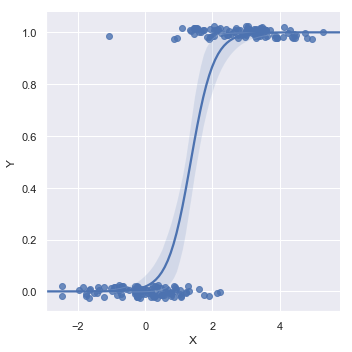

In [22]:
#Or, if you want to try to visualize the probability of membership in one of two groups, you can:
Y = np.random.randint(0,2,size=200)
X = list(map(lambda y: 3*y + np.random.randn(1)[0], Y))

sns.lmplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y}),logistic=True,y_jitter=.025)

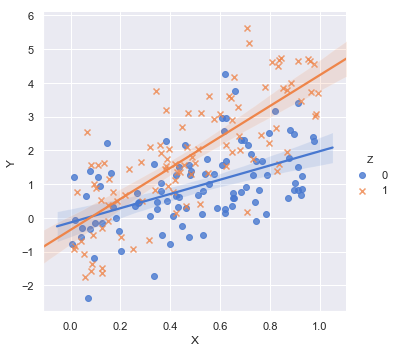

In [23]:
#You can also perform multiple regressions on the same graph
X = np.random.random(200)
Z = np.random.randint(0,2,size=200)
Y = list(map(lambda x, z: x*(z+1)*2 + np.random.randn(1)[0], X, Z)) #f(x) = (2x)**2 + N(0,1)

sns.lmplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y,'Z':Z}),hue='Z',markers=["o", "x"], palette="muted")

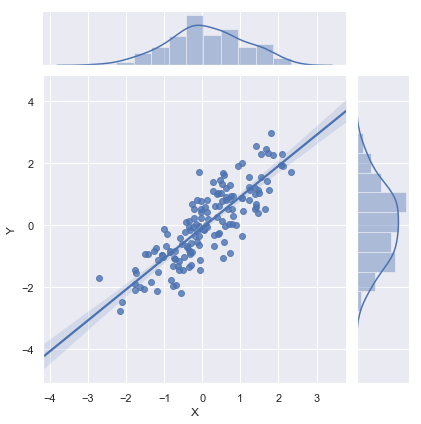

In [24]:
#Lastly, you can combine what we saw with the jointplot and the lmplot
X = np.random.randn(150).tolist()
Y = list(map(lambda x: x + np.random.randn(1)[0]/1.5, X))#f(x) = x + N(0,2/3)

sns.jointplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y}),kind='reg')

## 6) The Facet Grid and Customization
This is what can allow you to create combined graphics. You may have noticed the text <seaborn.axisgrid.FacetGrid at [Location]>, what is actually being returned is a FacetGrid, which has a graph on it. You can change this to add graphs or even plot many things at once. Let's look at some real data

In [25]:
#Prepare the Data
iris = datasets.load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names

#We would like to look at the data, and how it can help predict the target
data = pd.DataFrame(data,columns=feature_names)
target = pd.DataFrame(target,columns=['Target'])

full_data = data.join(target)
full_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


/Users/jacobswe/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/jacobswe/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/jacobswe/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


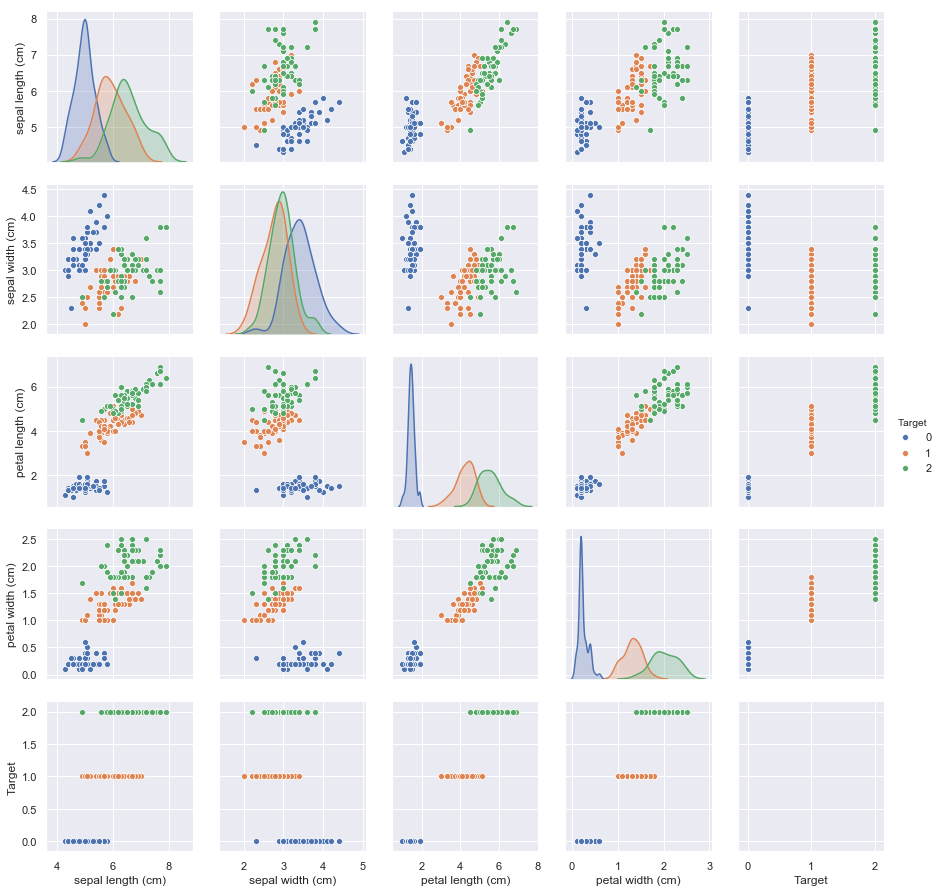

In [27]:
#This gives relplots histograms of the data for all columns.
sns.pairplot(full_data,hue='Target')

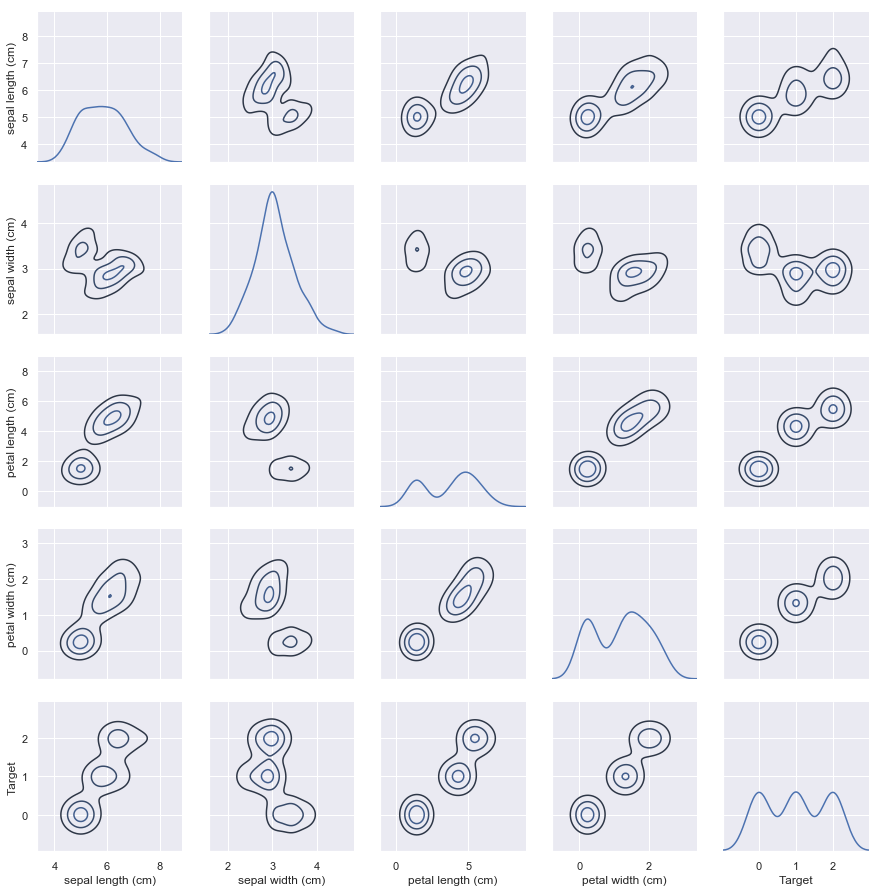

In [28]:
#It can also give some alternatives. This is computationally intensive and may take a moment.
fig = sns.PairGrid(full_data)
fig.map_diag(sns.kdeplot)
fig.map_offdiag(sns.kdeplot, n_levels=3)

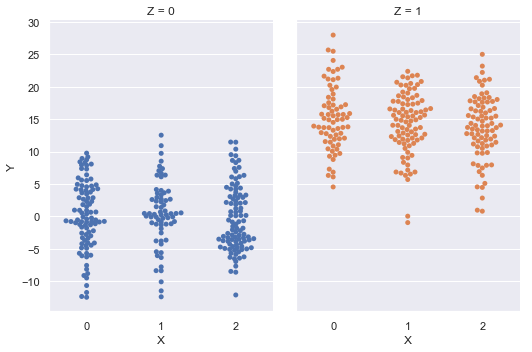

In [31]:
#Not just for inbuilt custom functions, you can create any sort of grid you might want.
X = np.random.randint(0,3,size=500)
Z = np.random.randint(0,2,size=500)
Y = np.random.randn(500)*5+15*Z

sns.catplot(x='X',y='Y',data=pd.DataFrame({'X':X,'Y':Y,'Z':Z}),hue='Z',col='Z',kind='swarm',aspect=.75)

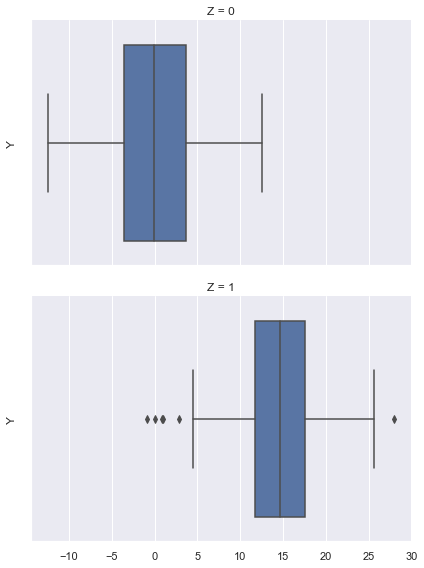

In [32]:
#Or as rows (as before, with more complex imaging, you will have to wait for the computation to complete)
sns.catplot(y='Y',data=pd.DataFrame({'X':X,'Y':Y,'Z':Z}),row='Z',kind='box',orient="h",height=4,aspect=1.5)

## So lets return to this real data and do some real graphical analysis

In [33]:
full_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


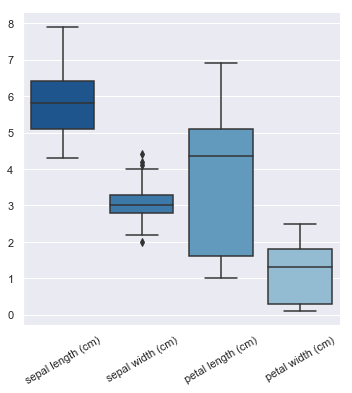

In [34]:
#We would like to understand how our predictors are distributed
ax = sns.catplot(data=data.iloc[:,:4], palette=sns.color_palette("Blues_r"), kind='box')
ax.set_xticklabels(rotation=30)

[Text(80.85312500000006, 0.5, 'Data'),
 Text(0.5, 12.453125, 'Data'),
 Text(0.5, 1.0, 'Correlation of Data')]

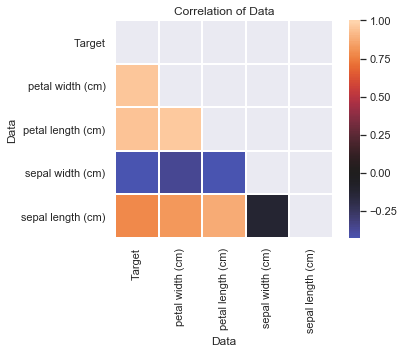

In [35]:
#How about we look to a correlogram, one of my favorite tools
matrix = full_data.iloc[:, ::-1].corr() #Swap the order so Target is first, compute correlations

#Create boolean mask
mask = np.zeros_like(matrix, dtype=np.bool)
#Mask top right triangle
mask[np.triu_indices_from(mask)] = 1

#Create heatmap
ax = sns.heatmap(matrix, mask=mask, center=0, square=True, color = sns.color_palette("PRGn", n_colors=7),linewidths=1)
ax.set(xlabel='Data', ylabel='Data', title='Correlation of Data')

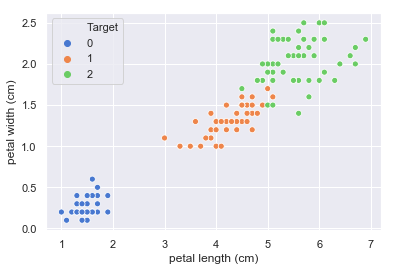

In [36]:
#Now, how about by category
sns.scatterplot(x=full_data.loc[:,'petal length (cm)'], y=full_data.loc[:,'petal width (cm)'],
                    hue=full_data.loc[:,'Target'], palette=sns.color_palette("muted",n_colors=3))

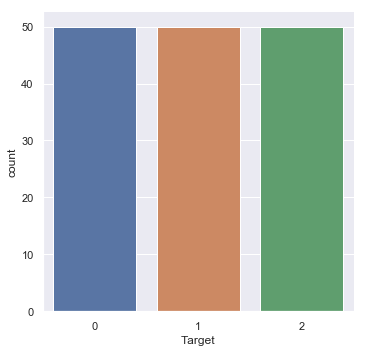

In [37]:
#Maybe also a view of our response sizes
sns.catplot(x='Target',data=pd.DataFrame(full_data.loc[:,'Target']),kind='count')

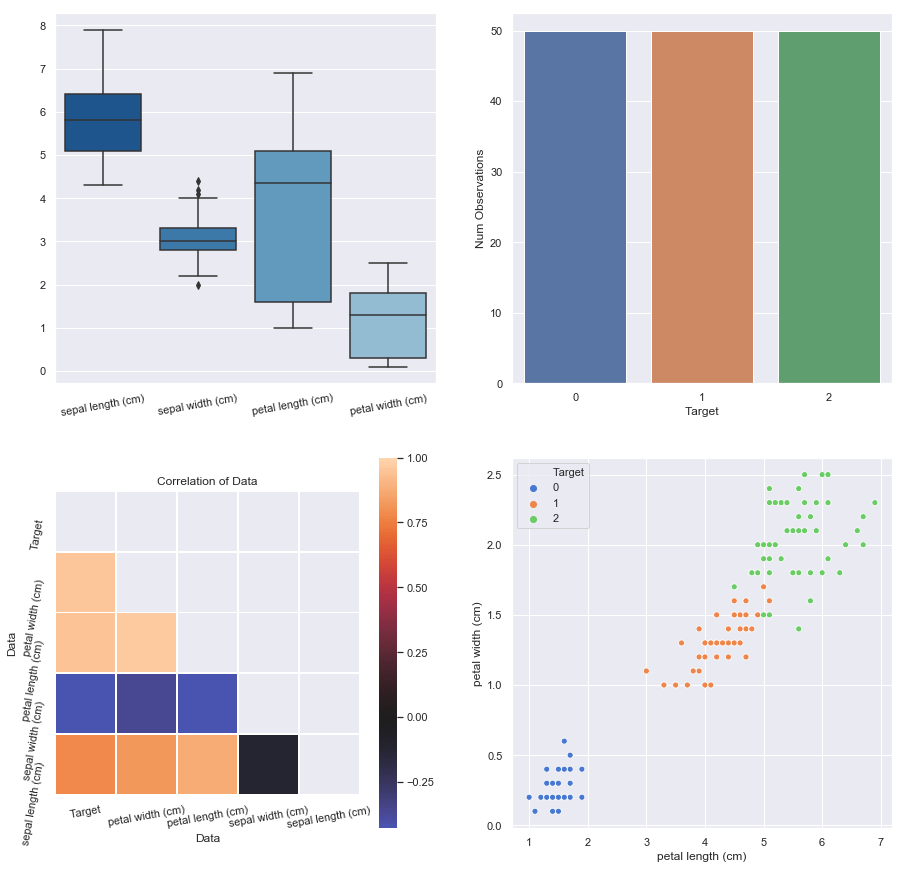

In [38]:
#Lastly, let's combine these four plots using MatPlotLib
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(15,15))

sns.boxplot(data=data.iloc[:,:4], palette=sns.color_palette("Blues_r"),ax=axs[0,0])
plt.setp(axs[0,0].get_xticklabels(), rotation=10)

sns.countplot(x='Target',data=pd.DataFrame(full_data.loc[:,'Target']),ax=axs[0,1])
axs[0,1].set(ylabel='Num Observations')

matrix = full_data.iloc[:, ::-1].corr()
mask = np.zeros_like(matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(matrix, mask=mask, center=0, square=True, color = sns.color_palette("PRGn", n_colors=7),
            linewidths=1, ax=axs[1,0])

plt.setp(axs[1,0].get_xticklabels(), rotation=10)
plt.setp(axs[1,0].get_yticklabels(), rotation=80)
axs[1,0].set(xlabel='Data', ylabel='Data', title='Correlation of Data')

sns.scatterplot(x=full_data.loc[:,'petal length (cm)'], y=full_data.loc[:,'petal width (cm)'], ax=axs[1,1],
                    hue=full_data.loc[:,'Target'], palette=sns.color_palette("muted",n_colors=3))

plt.show()

## 7) Now it's your turn. Let's break into teams and spend 15 minutes creating three graphs of this data.

## Python is great for this type of exploration, but this was a ton of work. How much of this can be done in Tableau?